In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv("all-three-awards.csv")
ethnic = pd.read_csv('2022-1990-ethnicity-lookup.csv')

In [3]:
# Fix datatype for year column
df['year'] = df['year'].astype(int)
df.dtypes

year                 int64
musician            object
work                object
category            object
status              object
cleaned_musician    object
dtype: object

In [4]:
# Only select Grammys from 1990 to 2023
df = df[df.year>1989]

In [5]:
# merge the two dataframes together
merged = pd.merge(df, ethnic, how='left', on='cleaned_musician')
merged.head(2)

,year,musician_x,work,category,status,cleaned_musician,musician_y,ethnicity,shared_award,Column1
0,2022,Jon Batiste,We Are,album-of-the-year,winner,Jon Batiste,Jon Batiste,UR,NaN,NaN
1,2022,Tony Bennett & Lady Gaga,Love for Sale,album-of-the-year,nominee,Tony Bennett Lady Gaga,Tony Bennett & Lady Gaga,white,NaN,NaN


In [6]:
# Fix NA values in ethnicity column
merged[merged.cleaned_musician=='soundtrack']

,year,musician_x,work,category,status,cleaned_musician,musician_y,ethnicity,shared_award,Column1
143,1997,soundtrack,Waiting to Exhale,album-of-the-year,nominee,soundtrack,soundtrack,NaN,NaN,NaN
163,1993,soundtrack,Beauty and the Beast,album-of-the-year,nominee,soundtrack,soundtrack,NaN,NaN,NaN


In [7]:
# Add ethnicity info for albums with musician "soundtrack"
merged.at[143,'ethnicity']='UR'
merged.at[163,'ethnicity']='white'

In [8]:
# Check to see if changes have been made
merged[merged.cleaned_musician=='soundtrack']

,year,musician_x,work,category,status,cleaned_musician,musician_y,ethnicity,shared_award,Column1
143,1997,soundtrack,Waiting to Exhale,album-of-the-year,nominee,soundtrack,soundtrack,UR,NaN,NaN
163,1993,soundtrack,Beauty and the Beast,album-of-the-year,nominee,soundtrack,soundtrack,white,NaN,NaN


In [9]:
# Add an unique ID column
merged['id'] = range(1, len(merged) + 1)
merged.head(2)

,year,musician_x,work,category,status,cleaned_musician,musician_y,ethnicity,shared_award,Column1,id
0,2022,Jon Batiste,We Are,album-of-the-year,winner,Jon Batiste,Jon Batiste,UR,NaN,NaN,1
1,2022,Tony Bennett & Lady Gaga,Love for Sale,album-of-the-year,nominee,Tony Bennett Lady Gaga,Tony Bennett & Lady Gaga,white,NaN,NaN,2


### Calculate the grammys's racial markup from each decade

In [63]:
merged.ethnicity.value_counts(normalize=True)

white    0.565141
UR       0.434859
Name: ethnicity, dtype: float64

In [81]:
before_2018 = merged[merged.year <= 2017]
before_2018.ethnicity.value_counts(normalize=True)

white    0.627078
UR       0.372922
Name: ethnicity, dtype: float64

pivot_past = pd.pivot_table(before_2018, values='id', 
                            index=['ethnicity'], 
                            columns='status', 
                            aggfunc='count',
                            fill_value=0)
pivot_past['total'] = pivot_past['nominee']+pivot_past['winner']
pivot_past['chance'] = pivot_past['winner']/pivot_past['total']

pivot_past

In [76]:
after_2018 = merged[merged['year'] > 2017]
after_2018.ethnicity.value_counts(normalize=True)

UR       0.612245
white    0.387755
Name: ethnicity, dtype: float64

In [96]:
pivot_2018 = pd.pivot_table(after_2018, values='id', 
                            index=['ethnicity'], 
                            columns='status', 
                            aggfunc='count',
                            fill_value=0)
pivot_2018['total'] = pivot_2018['nominee']+pivot_2018['winner']
pivot_2018['chance'] = pivot_2018['winner']/pivot_2018['total']

pivot_2018

status                        nominee  winner  total    chance
category           ethnicity                                  
album-of-the-year  UR              24       2     26  0.076923
                   white           19       4     23  0.173913
best-new-artist    UR              29       3     32  0.093750
                   white           14       3     17  0.176471
record-of-the-year UR              28       4     32  0.125000
                   white           15       2     17  0.117647

### A function to lookup award results by year

In [10]:
def look_up_year(i):
    df = merged[merged['year'] == i]
    return(df)

In [93]:
look_up_year(2011)

,year,musician_x,work,category,status,cleaned_musician,musician_y,ethnicity,shared_award,Column1,id,total_percentage,status/ethnicity
69,2011,Arcade Fire,The Suburbs,album-of-the-year,winner,Arcade Fire,Arcade Fire,white,NaN,NaN,70,0.333333,white winner
70,2011,Eminem,Recovery,album-of-the-year,nominee,Eminem,Eminem,white,NaN,NaN,71,0.333333,white nominee
71,2011,Lady Antebellum,Need You Now,album-of-the-year,nominee,Lady Antebellum,Lady Antebellum,white,NaN,NaN,72,0.333333,white nominee
72,2011,Lady Gaga,The Fame Monster,album-of-the-year,nominee,Lady Gaga,Lady Gaga,white,NaN,NaN,73,0.333333,white nominee
73,2011,Katy Perry,Teenage Dream,album-of-the-year,nominee,Katy Perry,Katy Perry,white,NaN,NaN,74,0.333333,white nominee
249,2011,Lady Antebellum,Need You Now,record-of-the-year,winner,Lady Antebellum,Lady Antebellum,white,NaN,NaN,250,0.333333,white winner
250,2011,B.o.B featuring Bruno Mars,Nothin’ on You,record-of-the-year,nominee,BoB featuring Bruno Mars,B.o.B featuring Bruno Mars,UR,NaN,NaN,251,0.333333,UR nominee
251,2011,Eminem featuring Rihanna,Love the Way You Lie,record-of-the-year,nominee,Eminem featuring Rihanna,Eminem featuring Rihanna,UR,shared,NaN,252,0.333333,UR nominee
252,2011,Cee Lo Green,Fuck You,record-of-the-year,nominee,Cee Lo Green,Cee Lo Green,UR,NaN,NaN,253,0.333333,UR nominee
253,2011,Jay-Z featuring Alicia Keys,Empire State of Mind,record-of-the-year,nominee,JayZ featuring Alicia Keys,Jay-Z featuring Alicia Keys,UR,NaN,NaN,254,0.333333,UR nominee


### A function that calculates the percentage of UR nominees in a spcific year

In [12]:
def get_total_percentage(i):
    df = merged[merged['year'] == i]
    total = df.value_counts('id').sum()
    UR_count = df[df['ethnicity'] == 'UR'].value_counts('id').sum()
    UR_percentage = UR_count/total
    return(UR_percentage)

In [91]:
get_total_percentage(2022)

0.6666666666666666

In [14]:
# Create a new column with percentage of UR nominees each year
merged['total_percentage'] = merged.apply(lambda x: get_total_percentage(x['year']), axis=1)
merged.head(2)

,year,musician_x,work,category,status,cleaned_musician,musician_y,ethnicity,shared_award,Column1,id,total_percentage
0,2022,Jon Batiste,We Are,album-of-the-year,winner,Jon Batiste,Jon Batiste,UR,NaN,NaN,1,0.666667
1,2022,Tony Bennett & Lady Gaga,Love for Sale,album-of-the-year,nominee,Tony Bennett Lady Gaga,Tony Bennett & Lady Gaga,white,NaN,NaN,2,0.666667


### A pivot table to see the racial makeup of nominees each year and the chance of winning

In [98]:
pivot = pd.pivot_table(merged, values='id', 
                            index=['ethnicity'], 
                            columns='status', 
                            aggfunc='count',
                            fill_value=0)
pivot['total'] = pivot['nominee']+pivot['winner']
pivot['chance'] = pivot['winner']/pivot['total']

pivot

status,nominee,winner,total,chance
ethnicity,,,,
UR,212,35,247,0.141700
white,254,67,321,0.208723


## A function to calculate the chance of winning by race in different award category

In [16]:
def chance_by_award(award):
    df=merged[merged.category == award]
    pivot = pd.pivot_table(df, values='id', 
                                index='ethnicity', 
                                columns='status', 
                                aggfunc='count',
                                fill_value=0)
    pivot['total'] = pivot['nominee']+pivot['winner']
    pivot['chance'] = pivot['winner']/pivot['total']
    
    white = pivot.iloc[1].chance
    UR = pivot.iloc[0].chance
    
    ratio = white/UR
    
    return(pivot,ratio)
    

In [17]:
chance_by_award('record-of-the-year')

(status     nominee  winner  total    chance
 ethnicity                                  
 UR              79      11     90  0.122222
 white           77      23    100  0.230000,
 1.881818181818182)

In [18]:
def chance_by_year(year):
    df=merged[merged.year == year]
    pivot = pd.pivot_table(df, values='id', 
                                index='ethnicity', 
                                columns='status', 
                                aggfunc='count',
                                fill_value=0)
    pivot['total'] = pivot['nominee']+pivot['winner']
    pivot['chance'] = pivot['winner']/pivot['total']
    
    white = pivot.iloc[1].chance
    UR = pivot.iloc[0].chance
    
    ratio = white/UR
    return(pivot,ratio)

In [53]:
chance_by_year(2011)

(status     nominee  winner  total  chance
 ethnicity                                
 UR               5       0      5     0.0
 white            7       3     10     0.3,
 inf)

# Some rough exploratory vizs

In [20]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [21]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [22]:
%%R

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [47]:
merged.value_counts("cleaned_musician").head(10)

cleaned_musician
Taylor Swift      10
Beyonce            9
Adele              8
Kendrick Lamar     7
Kanye West         6
Mariah Carey       6
Coldplay           5
U2                 5
Billie Eilish      5
Eminem             5
dtype: int64

### Plot the trends of UR nominations over the years

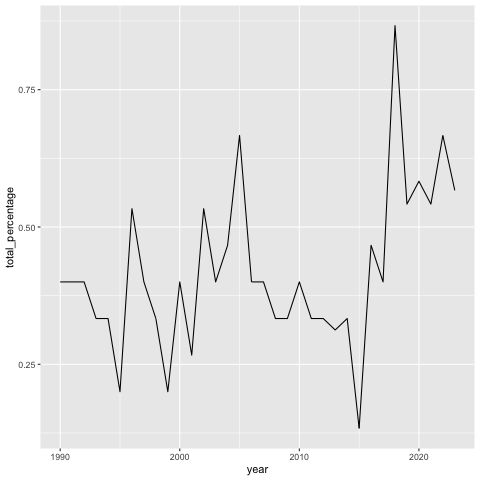

In [23]:
%%R -i merged
ggplot(merged,aes(y=total_percentage,x=year))+geom_line()

### Plot the makeup of white and non-white musicians nominated each year

In [24]:
all_years = pd.pivot_table(merged, values='id', 
                                index='year', 
                                columns='ethnicity', 
                                aggfunc='count',
                                fill_value=0)

all_years.reset_index(inplace=True)
all_years.head()
# all_years_melted =pd.melt(all_years, id_vars =['ethnicity year'], value_vars =['UR', 'white'])
# all_years_melted

ethnicity,year,UR,white
0,1990,6,9
1,1991,6,9
2,1992,6,9
3,1993,5,10
4,1994,5,10


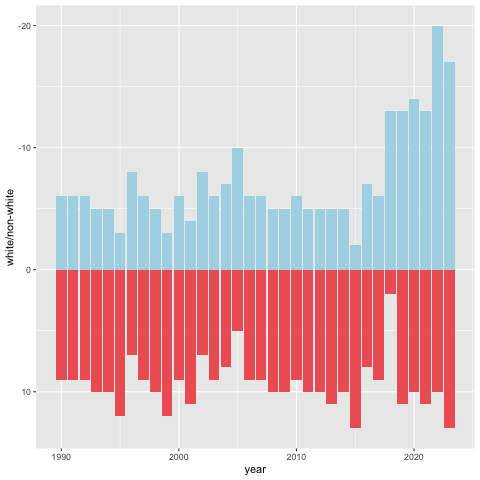

In [25]:
%%R -i all_years
all_years<- mutate(all_years, UR = -UR)

ggplot(all_years, aes(x = year)) +
    geom_col(aes(y = white), fill = "indianred2")+
    geom_col(aes(y = UR), fill = "lightblue")+
    labs(x = "year",
         y = "white/non-white")+
#     coord_flip()+
    scale_y_reverse()


### Plot the makeup of white and non-white nominations and winner's race over the years

In [26]:
merged['status/ethnicity'] = merged['ethnicity']+" "+merged['status']
merged.head(2)

,year,musician_x,work,category,status,cleaned_musician,musician_y,ethnicity,shared_award,Column1,id,total_percentage,status/ethnicity
0,2022,Jon Batiste,We Are,album-of-the-year,winner,Jon Batiste,Jon Batiste,UR,NaN,NaN,1,0.666667,UR winner
1,2022,Tony Bennett & Lady Gaga,Love for Sale,album-of-the-year,nominee,Tony Bennett Lady Gaga,Tony Bennett & Lady Gaga,white,NaN,NaN,2,0.666667,white nominee


In [48]:
merged.to_csv("musicians-matched.csv",index=False)

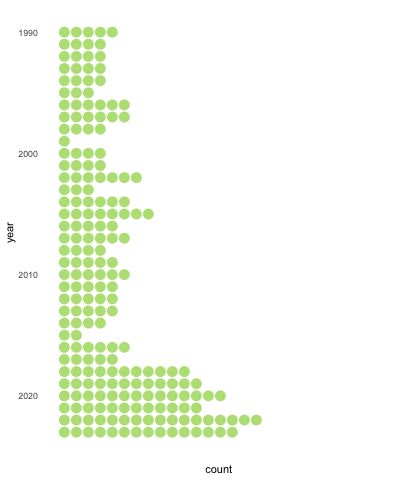

In [27]:
%%R -i merged -w 400

UR_section<-merged%>%filter(ethnicity == "UR")%>%filter(status == "nominee")

UR_section

UR_plot <- ggplot(UR_section, aes(x = year)) +
  geom_dotplot(stackgroups = TRUE, binwidth = 1, binpositions = "all", fill="#b8e186",stroke=NA,stackratio=1.1, dotsize=0.9) +
  coord_flip()+ 
  scale_x_reverse()+
    theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.x = element_blank()
  )

UR_plot


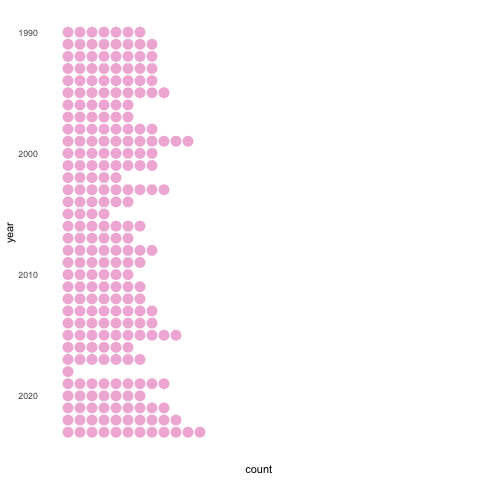

In [28]:
%%R

white_section<-merged%>%filter(ethnicity == "white")%>%filter(status == "nominee")

white_section

white_plot <- ggplot(white_section, aes(x = year)) +
  geom_dotplot(stackgroups = TRUE, binwidth = 1, binpositions = "all", fill="#f1b6da",stroke=NA,stackratio=1.1, dotsize=0.9) +
  coord_flip() +
  scale_x_reverse()+
    theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.x = element_blank()
  )

white_plot


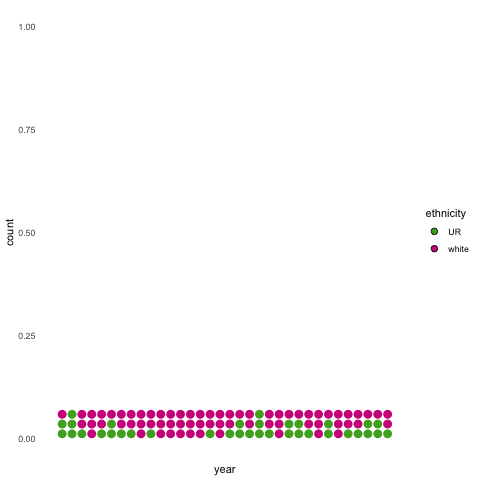

In [49]:
%%R
# winners
white_section<-merged%>%filter(status == "winner")

white_section

winner<- ggplot(white_section, aes(x = year, fill=ethnicity)) +
  geom_dotplot(stackgroups = TRUE, binwidth = 1, binpositions = "all",stroke=NA,stackratio=1.1, dotsize=0.9) +
  scale_fill_manual(values=c("#4dac26", "#d01c8b"))+
#   coord_flip() +
  scale_x_reverse()+
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.x = element_blank()
  )

winner


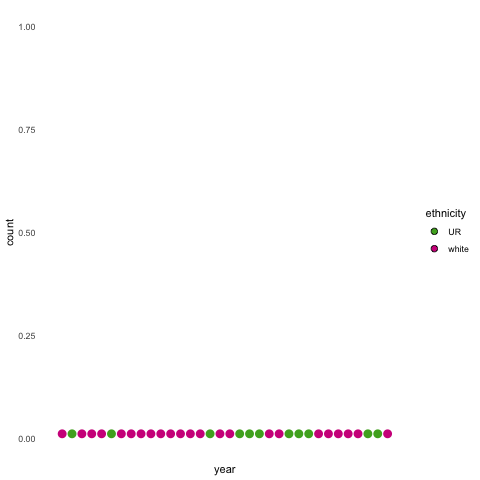

In [57]:
%%R
# winners
album_section<-merged%>%filter(status == "winner")%>%filter(category=='album-of-the-year')

album_section

album<- ggplot(album_section, aes(x = year, fill=ethnicity)) +
  geom_dotplot(stackgroups = TRUE, binwidth = 1, binpositions = "all",stroke=NA,stackratio=1.1, dotsize=0.9) +
  scale_fill_manual(values=c("#4dac26", "#d01c8b"))+
#   coord_flip() +
  scale_x_reverse()+
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.x = element_blank()
  )

album

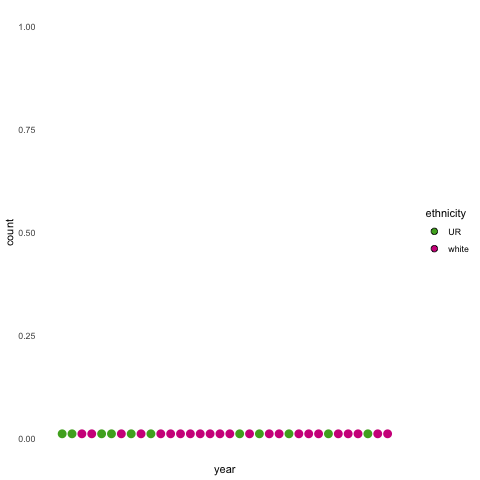

In [58]:
%%R
# winners
record_section<-merged%>%filter(status == "winner")%>%filter(category=='record-of-the-year')

record_section

record<- ggplot(record_section, aes(x = year, fill=ethnicity)) +
  geom_dotplot(stackgroups = TRUE, binwidth = 1, binpositions = "all",stroke=NA,stackratio=1.1, dotsize=0.9) +
  scale_fill_manual(values=c("#4dac26", "#d01c8b"))+
#   coord_flip() +
  scale_x_reverse()+
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.x = element_blank()
  )

record

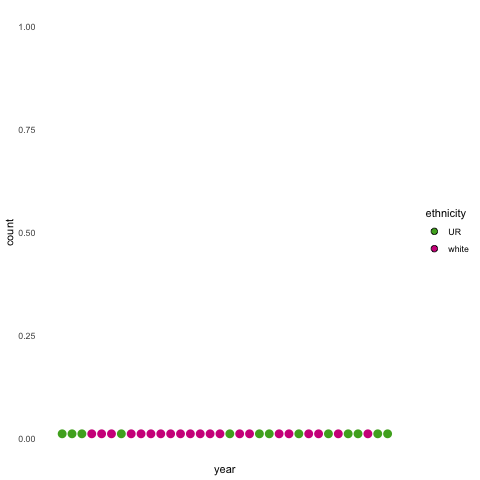

In [59]:
%%R
# winners
artist_section<-merged%>%filter(status == "winner")%>%filter(category=='best-new-artist')


artist<- ggplot(artist_section, aes(x = year, fill=ethnicity)) +
  geom_dotplot(stackgroups = TRUE, binwidth = 1, binpositions = "all",stroke=NA,stackratio=1.1, dotsize=0.9) +
  scale_fill_manual(values=c("#4dac26", "#d01c8b"))+
#   coord_flip() +
  scale_x_reverse()+
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.x = element_blank()
  )

artist

In [30]:
%%R
  
ggsave("white.pdf", white_plot, device = "pdf")
ggsave("winner.pdf", winner, device = "pdf")
ggsave("urplot.pdf", UR_plot, device = "pdf")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


### Plotting racial makeup of both nominees and winners across category

In [31]:
summary = merged.pivot_table(values='id', 
                                index=['year','status/ethnicity'], 
#                                 columns=[], 
                                aggfunc='count',
                                fill_value=0)

summary.reset_index(inplace=True)
summary.columns=['year', 'category', 'count']
# df.pivot_table(index=['id','item'], columns=['date'], values='buy',aggfunc='sum', fill_value=0).reset_index()
summary.head()

,year,category,count
0,1990,UR nominee,5
1,1990,UR winner,1
2,1990,white nominee,7
3,1990,white winner,2
4,1991,UR nominee,4


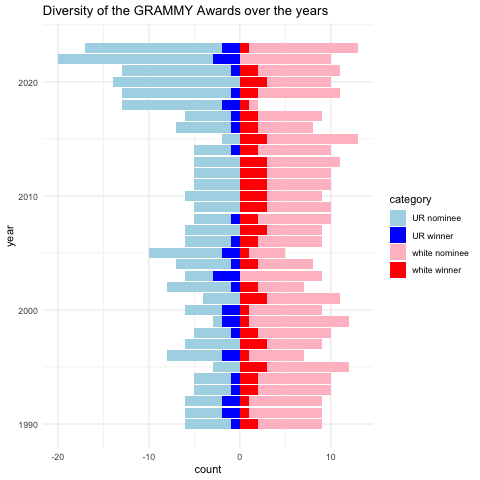

In [32]:
%%R -i summary
diverging <- summary %>%
    mutate(count = ifelse(grepl("UR", category), -count, count))

ggplot(diverging, aes(x = year, 
            y = count,
             fill = category)) +
scale_fill_manual(values = c("UR nominee" = "lightblue","UR winner" = "blue",'white winner' = 'red','white nominee'='pink'))+
  geom_col() +
  coord_flip() +
  labs(title = "Diversity of the GRAMMY Awards over the years") +
  theme_minimal()


### Plotting racial makeup of both nominees and winners of "Album of the Year"

In [33]:
album_summary = merged[merged.category =="album-of-the-year"].pivot_table(values='id', 
                                index=['year','status/ethnicity'], 
#                                 columns=[], 
                                aggfunc='count',
                                fill_value=0)
album_summary.reset_index(inplace=True)
album_summary.head(2)

,year,status/ethnicity,id
0,1990,UR nominee,1
1,1990,white nominee,3


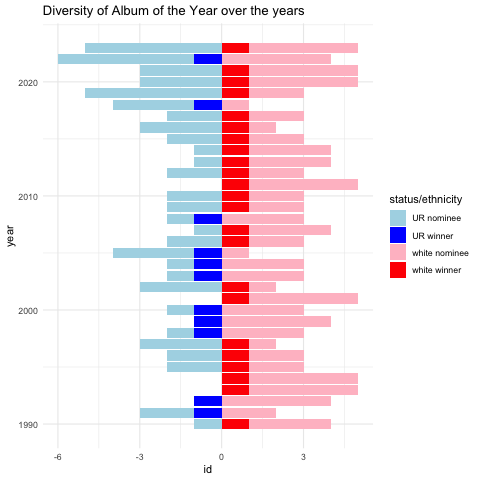

In [34]:
%%R -i album_summary
album_diverging <- album_summary %>%
    mutate(id = ifelse(grepl("UR", `status/ethnicity`), -id, id))
album_diverging

ggplot(album_diverging, aes(x = year, 
            y = id,
             fill = `status/ethnicity`)) +
scale_fill_manual(values = c("UR nominee" = "lightblue","UR winner" = "blue",'white winner' = 'red','white nominee'='pink'))+
  geom_col() +
  coord_flip() +
  labs(title = "Diversity of Album of the Year over the years") +
  theme_minimal()


### Plotting racial makeup of both nominees and winners of "Record of the Year"

In [35]:
record_summary = merged[merged.category =="record-of-the-year"].pivot_table(values='id', 
                                index=['year','status/ethnicity'], 
#                                 columns=[], 
                                aggfunc='count',
                                fill_value=0)
record_summary.reset_index(inplace=True)
record_summary.head(2)

,year,status/ethnicity,id
0,1990,UR nominee,1
1,1990,white nominee,3


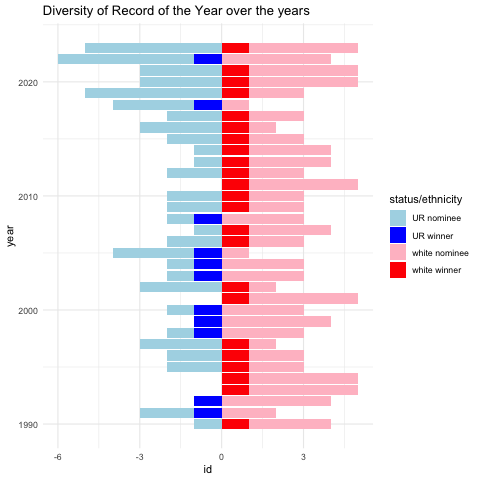

In [50]:
%%R -i record_summary
record_diverging <- album_summary %>%
    mutate(id = ifelse(grepl("UR", `status/ethnicity`), -id, id))

ggplot(record_diverging, aes(x = year, 
            y = id,
             fill = `status/ethnicity`)) +
scale_fill_manual(values = c("UR nominee" = "lightblue","UR winner" = "blue",'white winner' = 'red','white nominee'='pink'))+
  geom_col() +
  coord_flip() +
  labs(title = "Diversity of Record of the Year over the years") +
  theme_minimal()
